# Gun Violence Mass Shootings in America 2024 Compared to 2018-2023
##### Data comes from gunviolencearchive.org (downloaded from kaggle)

In [2]:
#import needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import iqr

### Inspecting and reading the data:

In [4]:
gun_violence_2024 = pd.read_csv('mass_shooting_2024.csv')

print(gun_violence_2024.head())

#Loading in the 2023, 2022, 2021, and 2019 data as well
gun_violence_2023 = pd.read_csv('mass_shooting_2023.csv')

gun_violence_2022 = pd.read_csv('mass_shooting_2022.csv')

gun_violence_2021 = pd.read_csv('mass_shooting_2021.csv')

gun_violence_2020 = pd.read_csv('mass_shooting_2020.csv')

gun_violence_2019 = pd.read_csv('mass_shooting_2019.csv')

gun_violence_2018 = pd.read_csv('mass_shooting_2018.csv')

   Incident ID     Incident Date        State       City Or County  \
0      3061376  November 1, 2024     Colorado  Denver (Northglenn)   
1      3061364  November 1, 2024      Florida              Orlando   
2      3061407  November 1, 2024  Connecticut            New Haven   
3      3061008  October 31, 2024     Delaware           Wilmington   
4      3060963  October 30, 2024      Florida            Dade City   

                           Address  Victims Killed  Victims Injured  \
0                   248 Belford Dr               3                3   
1  E Central Blvd and N Orange Ave               2                6   
2          Church St and Center St               0                4   
3          1300 block of E 28th St               1                3   
4                      Starline Dr               0                4   

   Suspects Killed  Suspects Injured  Suspects Arrested  Operations  
0                0                 0                  0         NaN  
1           

In [5]:
print(gun_violence_2024.columns)

#So 2023 has the same columns but without the latitude, longitude, and coordinates found
print(gun_violence_2023.columns)

Index(['Incident ID', 'Incident Date', 'State', 'City Or County', 'Address',
       'Victims Killed', 'Victims Injured', 'Suspects Killed',
       'Suspects Injured', 'Suspects Arrested', 'Operations'],
      dtype='object')
Index(['Incident ID', 'Incident Date', 'State', 'City Or County', 'Address',
       'Victims Killed', 'Victims Injured', 'Suspects Killed',
       'Suspects Injured', 'Suspects Arrested', 'Operations'],
      dtype='object')


# The datasets have the following columns:
* **Incident ID**: Unique number given to each case
* **Incident Date**: Date of the shooting, formatted as month day, year
* **State:** The state it happened in
* **City Or County:** The city or county it happened in
* **Address:** Address of shooting
* **Victims Killed:** Number of victim deaths
* **Victims Injured:** Number of victims injured
* **Suspects Killed:** Number of suspects killed
* **Suspects Injured:** Number of suspects injured
* **Suspects Arrested:** Number of suspects arrested
* **Operations:** Null on these csv files, but on the website it links to another page

In [6]:
#Checking how many null entries each dataset has
print(gun_violence_2024.info())
print('Note that Operations is a useless column that has only null values here (on gunviolencearchive.org, this column contains a link to a seperate page)')
print('Also note that there is only 1 null Address')

print()
print("For 2023, there are no null entries")
print(gun_violence_2023.info())

print()
print("For 2022, there are no null entries")
print(gun_violence_2022.info())

print()
print("For 2021, there are no null entries")
print(gun_violence_2021.info())

print()
print("For 2020, there are no null entries")
print(gun_violence_2020.info())

print()
print("For 2019, there are no null entries")
print(gun_violence_2019.info())

print()
print("For 2018, there are no null entries")
print(gun_violence_2018.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Incident ID        442 non-null    int64  
 1   Incident Date      442 non-null    object 
 2   State              442 non-null    object 
 3   City Or County     442 non-null    object 
 4   Address            441 non-null    object 
 5   Victims Killed     442 non-null    int64  
 6   Victims Injured    442 non-null    int64  
 7   Suspects Killed    442 non-null    int64  
 8   Suspects Injured   442 non-null    int64  
 9   Suspects Arrested  442 non-null    int64  
 10  Operations         0 non-null      float64
dtypes: float64(1), int64(6), object(4)
memory usage: 38.1+ KB
None
Note that Operations is a useless column that has only null values here (on gunviolencearchive.org, this column contains a link to a seperate page)
Also note that there is only 1 null Address

For 2023, 

In [7]:
#Look at statistics in the 2024 and 2023 dataset
print('For 2024:')
print(gun_violence_2024.describe(include = 'all'))
print()

print('For 2023:')
print(gun_violence_2023.describe(include = 'all'))

For 2024:
         Incident ID   Incident Date     State City Or County         Address  \
count   4.420000e+02             442       442            442             441   
unique           NaN             197        43            244             441   
top              NaN  March 31, 2024  Illinois        Chicago  248 Belford Dr   
freq             NaN               9        33             25               1   
mean    2.933784e+06             NaN       NaN            NaN             NaN   
std     7.150224e+04             NaN       NaN            NaN             NaN   
min     2.791411e+06             NaN       NaN            NaN             NaN   
25%     2.880004e+06             NaN       NaN            NaN             NaN   
50%     2.940378e+06             NaN       NaN            NaN             NaN   
75%     2.987229e+06             NaN       NaN            NaN             NaN   
max     3.061407e+06             NaN       NaN            NaN             NaN   

        Victims K

# Ideas:
##### 1.) Find the states and cities with the greatest number of shootings
##### 2.) Find how many people have been impacted by mass shootings this year
##### 3.) Find the month with the greatest number of shootings
##### 4.) Compare data from 2024 to 2023 and other previous years

In [9]:
print(gun_violence_2024['Incident Date'].unique())
#So this goes from January to the first day of November (the day the data was downloaded)

['November 1, 2024' 'October 31, 2024' 'October 30, 2024'
 'October 28, 2024' 'October 27, 2024' 'October 26, 2024'
 'October 24, 2024' 'October 23, 2024' 'October 21, 2024'
 'October 20, 2024' 'October 19, 2024' 'October 14, 2024'
 'October 12, 2024' 'October 11, 2024' 'October 9, 2024' 'October 6, 2024'
 'October 5, 2024' 'October 4, 2024' 'September 29, 2024'
 'September 28, 2024' 'September 27, 2024' 'September 26, 2024'
 'September 25, 2024' 'September 21, 2024' 'September 20, 2024'
 'September 18, 2024' 'September 16, 2024' 'September 15, 2024'
 'September 14, 2024' 'September 13, 2024' 'September 12, 2024'
 'September 7, 2024' 'September 6, 2024' 'September 4, 2024'
 'September 2, 2024' 'September 1, 2024' 'August 31, 2024'
 'August 30, 2024' 'August 29, 2024' 'August 27, 2024' 'August 25, 2024'
 'August 24, 2024' 'August 22, 2024' 'August 21, 2024' 'August 20, 2024'
 'August 18, 2024' 'August 17, 2024' 'August 16, 2024' 'August 14, 2024'
 'August 13, 2024' 'August 12, 2024' 'Au

In [10]:
#Creating a month column
gun_violence_2024['Month'] = gun_violence_2024.apply(lambda x: x['Incident Date'].split(' ')[0], axis=1)
print(gun_violence_2024.head())

#Do the same for 2023
gun_violence_2023['Month'] = gun_violence_2023.apply(lambda x: x['Incident Date'].split(' ')[0], axis=1)

#Do the same for 2022
gun_violence_2022['Month'] = gun_violence_2022.apply(lambda x: x['Incident Date'].split(' ')[0], axis=1)

#Do the same for 2021
gun_violence_2021['Month'] = gun_violence_2021.apply(lambda x: x['Incident Date'].split(' ')[0], axis=1)

#Do the same for 2020
gun_violence_2020['Month'] = gun_violence_2020.apply(lambda x: x['Incident Date'].split(' ')[0], axis=1)

#Do the same for 2019
gun_violence_2019['Month'] = gun_violence_2019.apply(lambda x: x['Incident Date'].split(' ')[0], axis=1)

#Do the same for 2018
gun_violence_2018['Month'] = gun_violence_2018.apply(lambda x: x['Incident Date'].split(' ')[0], axis=1)

   Incident ID     Incident Date        State       City Or County  \
0      3061376  November 1, 2024     Colorado  Denver (Northglenn)   
1      3061364  November 1, 2024      Florida              Orlando   
2      3061407  November 1, 2024  Connecticut            New Haven   
3      3061008  October 31, 2024     Delaware           Wilmington   
4      3060963  October 30, 2024      Florida            Dade City   

                           Address  Victims Killed  Victims Injured  \
0                   248 Belford Dr               3                3   
1  E Central Blvd and N Orange Ave               2                6   
2          Church St and Center St               0                4   
3          1300 block of E 28th St               1                3   
4                      Starline Dr               0                4   

   Suspects Killed  Suspects Injured  Suspects Arrested  Operations     Month  
0                0                 0                  0         NaN  Nov

In [11]:
#Let's also create a total victim column that adds the killed and injured columns together
gun_violence_2024['Total Victims'] = gun_violence_2024['Victims Killed'] + gun_violence_2024['Victims Injured']

gun_violence_2023['Total Victims'] = gun_violence_2023['Victims Killed'] + gun_violence_2023['Victims Injured']

gun_violence_2022['Total Victims'] = gun_violence_2022['Victims Killed'] + gun_violence_2022['Victims Injured']

gun_violence_2021['Total Victims'] = gun_violence_2021['Victims Killed'] + gun_violence_2021['Victims Injured']

gun_violence_2020['Total Victims'] = gun_violence_2020['Victims Killed'] + gun_violence_2020['Victims Injured']

gun_violence_2019['Total Victims'] = gun_violence_2019['Victims Killed'] + gun_violence_2019['Victims Injured']

gun_violence_2018['Total Victims'] = gun_violence_2018['Victims Killed'] + gun_violence_2018['Victims Injured']

#### In order to compare the current data to 2023, let's look at a subset of the 2023 data that also only goes through October

In [13]:
#Creating the subset
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October']
gun_violence_2024_short = gun_violence_2024[gun_violence_2024['Month'].isin(months)]
gun_violence_2023_short = gun_violence_2023[gun_violence_2023['Month'].isin(months)]
gun_violence_2022_short = gun_violence_2022[gun_violence_2022['Month'].isin(months)]
gun_violence_2021_short = gun_violence_2021[gun_violence_2021['Month'].isin(months)]
gun_violence_2020_short = gun_violence_2020[gun_violence_2020['Month'].isin(months)]
gun_violence_2019_short = gun_violence_2019[gun_violence_2019['Month'].isin(months)]
gun_violence_2018_short = gun_violence_2018[gun_violence_2019['Month'].isin(months)]



print(gun_violence_2023_short.Month.unique())
print(len(gun_violence_2023_short))

['October' 'September' 'August' 'July' 'June' 'May' 'April' 'March'
 'February' 'January']
587


C:\Users\miner\AppData\Local\Temp\ipykernel_14848\2951677420.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gun_violence_2018_short = gun_violence_2018[gun_violence_2019['Month'].isin(months)]


In [14]:
#Also creating a list of full months
months_full = months + ['November', 'December']

print(months_full)

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


#### Which month appears the most in the data 2023 and 2024?

In [16]:
#Which month appears the most in this data?
month_counts_2024_short = gun_violence_2024_short.Month.value_counts().reset_index()
print("For 2024:")
print(month_counts_2024_short)

print()

month_counts_2023 = gun_violence_2023.Month.value_counts().reset_index()
print("For 2023:")
print(month_counts_2023)

#Creating one for later for 2023 only to October
month_counts_2023_short = gun_violence_2023_short.Month.value_counts().reset_index()



#Let's also make a value counts for every other year:
month_counts_2022 = gun_violence_2022.Month.value_counts().reset_index()
month_counts_2021 = gun_violence_2021.Month.value_counts().reset_index()
month_counts_2020 = gun_violence_2020.Month.value_counts().reset_index()
month_counts_2019 = gun_violence_2019.Month.value_counts().reset_index()
month_counts_2018 = gun_violence_2018.Month.value_counts().reset_index()

For 2024:
       Month  count
0       June     72
1       July     63
2        May     52
3     August     51
4    January     38
5      April     37
6  September     36
7      March     34
8    October     29
9   February     27

For 2023:
        Month  count
0        July     85
1         May     79
2        June     68
3     October     65
4      August     57
5       April     55
6     January     54
7   September     42
8       March     41
9    February     41
10   December     38
11   November     34


C:\Users\miner\AppData\Local\Temp\ipykernel_14848\2939228809.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = month_counts_2024_short, x = 'Month', y= 'count', palette = 'Set1')
C:\Users\miner\AppData\Local\Temp\ipykernel_14848\2939228809.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = month_counts_2023, x = 'Month', y= 'count', palette = 'Set1')


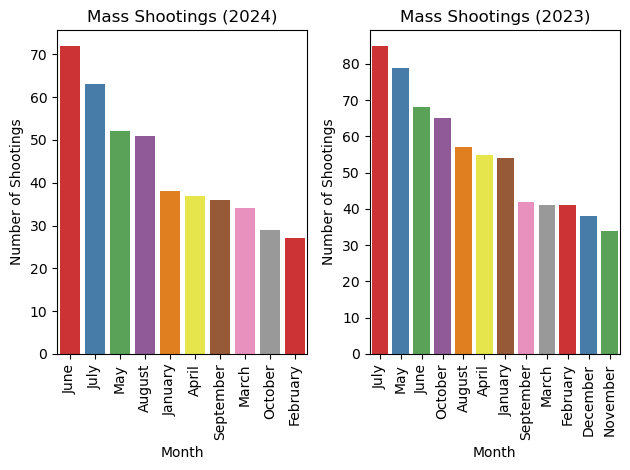

<Figure size 640x480 with 0 Axes>

In [17]:
#Making bar graphs to see this visually
plt.subplot(1,2,1)
sns.barplot(data = month_counts_2024_short, x = 'Month', y= 'count', palette = 'Set1')
plt.xticks(rotation = 90)
plt.title('Mass Shootings (2024)')
plt.ylabel('Number of Shootings')


plt.subplot(1,2,2)
sns.barplot(data = month_counts_2023, x = 'Month', y= 'count', palette = 'Set1')
plt.xticks(rotation = 90)
plt.title('Mass Shootings (2023)')
plt.ylabel('Number of Shootings')
plt.tight_layout()
plt.show()
plt.clf()

#### What is the last date of October shown in this data for 2024?

In [19]:
print(gun_violence_2024['Incident Date'][gun_violence_2024['Month'] == 'November'])
print()
print('Thus, the data for November goes until the 1st (Note, this data was downloaded on the 1st of November).')

0    November 1, 2024
1    November 1, 2024
2    November 1, 2024
Name: Incident Date, dtype: object

Thus, the data for November goes until the 1st (Note, this data was downloaded on the 1st of November).


## Let's look at some statistics about Victims killed or injured

In [21]:
print(gun_violence_2024_short['Victims Killed'].unique())
print(gun_violence_2024_short['Victims Injured'].unique())
print()

print(gun_violence_2024_short['Victims Killed'].value_counts())
print()
print(gun_violence_2024_short['Victims Injured'].value_counts())

[1 0 2 5 3 4 6 8]
[ 3  4  5  6  1  8  7 10  9 14 17  0  2 15 19 16 13 12 28 11 22]

Victims Killed
0    187
1    150
2     56
3     22
4     18
5      4
6      1
8      1
Name: count, dtype: int64

Victims Injured
4     123
3      99
5      70
2      35
6      33
7      19
1      14
0      12
8      10
9       6
10      5
12      2
14      2
15      2
11      1
28      1
17      1
13      1
16      1
19      1
22      1
Name: count, dtype: int64


#### Mean and Median of Injured and Killed For 2024:

In [23]:
mean_vict_injured = gun_violence_2024_short['Victims Injured'].mean()
median_vict_injured = gun_violence_2024_short['Victims Injured'].median()

print("The mean number of victims injured is {}.".format(mean_vict_injured))
print()
print("The median number of victims injured is {}.".format(median_vict_injured))

#That formula in the .format is 1.5 * the iqr away from the third quartile (the usual method for labeling outliers)
print("The higher mean is due to the skewing from the outliers containing injuries above {}".format(gun_violence_2024_short['Victims Injured'].quantile(0.75) + 1.5 * iqr(gun_violence_2024_short['Victims Injured'])))

The mean number of victims injured is 4.432801822323462.

The median number of victims injured is 4.0.
The higher mean is due to the skewing from the outliers containing injuries above 8.0


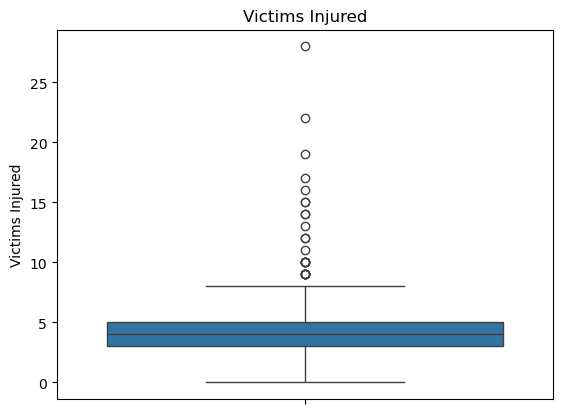

<Figure size 640x480 with 0 Axes>

In [24]:
sns.boxplot(gun_violence_2024_short["Victims Injured"])
plt.title('Victims Injured')
plt.show()
plt.clf()

In [25]:
mean_vict_killed = gun_violence_2024_short['Victims Killed'].mean()
median_vict_killed = gun_violence_2024_short['Victims Killed'].median()

print("The mean number of victims killed is {}.".format(mean_vict_killed))
print()
print("The median number of victims killed is {}.".format(median_vict_killed))

The mean number of victims killed is 0.9886104783599089.

The median number of victims killed is 1.0.


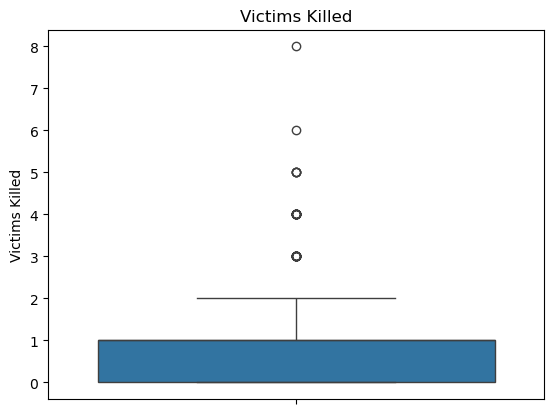

<Figure size 640x480 with 0 Axes>

In [26]:
sns.boxplot(gun_violence_2024_short["Victims Killed"])
plt.title('Victims Killed')
plt.show()
plt.clf()

## Mass Shooting with the most injured victims

In [28]:
#This is the mass shooting with the most injured victims. Note that as of November 1st, the suspect has not been caught
print(gun_violence_2024_short[gun_violence_2024_short['Victims Injured'] == 28])

     Incident ID Incident Date State City Or County                Address  \
248      2928467  June 2, 2024  Ohio          Akron  Kelly Ave and 8th Ave   

     Victims Killed  Victims Injured  Suspects Killed  Suspects Injured  \
248               1               28                0                 0   

     Suspects Arrested  Operations Month  Total Victims  
248                  0         NaN  June             29  


## Mass Shooting with the most victims killed

In [30]:
#Note: The suspect was related to 7 of the victims, and he shot himself after confronted by law enforcement the day after
print(gun_violence_2024_short[gun_violence_2024_short['Victims Killed'] == 8])

     Incident ID     Incident Date     State City Or County  \
419      2808531  January 21, 2024  Illinois         Joliet   

                   Address  Victims Killed  Victims Injured  Suspects Killed  \
419  200 block of Davis St               8                1                1   

     Suspects Injured  Suspects Arrested  Operations    Month  Total Victims  
419                 0                  1         NaN  January              9  


## How many people have been affected by mass shootings this year?

In [32]:
print("So far in 2024 (up through November 1st), {} people have been either injured or killed in mass shootings.".format(gun_violence_2024['Total Victims'].sum()))

print()
print("{} of those people were killed and {} of those people were injured.".format(gun_violence_2024["Victims Killed"].sum(), gun_violence_2024["Victims Injured"].sum()))

So far in 2024 (up through November 1st), 2398 people have been either injured or killed in mass shootings.

439 of those people were killed and 1959 of those people were injured.


## Let's compare graphically between 2023 and 2024 for the number of mass shootings per month:

In [34]:
#Ordering them by month instead of count order
order_2024 = []
order_2023_short = []

order_2023 = []
order_2022 = []
order_2021 = []
order_2020 = []
order_2019 = []
order_2018 = []

#For 2024:
for month in months:
    shootings = month_counts_2024_short['count'][month_counts_2024_short['Month'] == month]
    order_2024.append(shootings.values[0])
print(order_2024)

#For 2023 through October:
for month in months:
    shootings = month_counts_2023_short['count'][month_counts_2023_short['Month'] == month]
    order_2023_short.append(shootings.values[0])
print(order_2023_short)

#Doing the same thing but for the entire lengths of years
#For 2023:
for month in months_full:
    shootings = month_counts_2023['count'][month_counts_2023['Month'] == month]
    order_2023.append(shootings.values[0])
print(order_2023)

#For 2022:
for month in months_full:
    shootings = month_counts_2022['count'][month_counts_2022['Month'] == month]
    order_2022.append(shootings.values[0])
print(order_2023)

#For 2021:
for month in months_full:
    shootings = month_counts_2021['count'][month_counts_2021['Month'] == month]
    order_2021.append(shootings.values[0])
print(order_2021)

#For 2020:
for month in months_full:
    shootings = month_counts_2020['count'][month_counts_2020['Month'] == month]
    order_2020.append(shootings.values[0])
print(order_2020)

#For 2019:
for month in months_full:
    shootings = month_counts_2019['count'][month_counts_2019['Month'] == month]
    order_2019.append(shootings.values[0])
print(order_2019)

#For 2018:
for month in months_full:
    shootings = month_counts_2018['count'][month_counts_2018['Month'] == month]
    order_2018.append(shootings.values[0])
print(order_2018)

[38, 27, 34, 37, 52, 72, 63, 51, 36, 29]
[54, 41, 41, 55, 79, 68, 85, 57, 42, 65]
[54, 41, 41, 55, 79, 68, 85, 57, 42, 65, 34, 38]
[54, 41, 41, 55, 79, 68, 85, 57, 42, 65, 34, 38]
[32, 40, 45, 50, 73, 75, 84, 64, 66, 72, 49, 39]
[25, 20, 24, 26, 59, 94, 89, 80, 68, 51, 49, 26]
[25, 20, 20, 32, 48, 53, 41, 40, 34, 34, 33, 34]
[22, 14, 17, 25, 28, 51, 45, 33, 34, 30, 21, 15]


## Make a line graph comparing the 2 years:

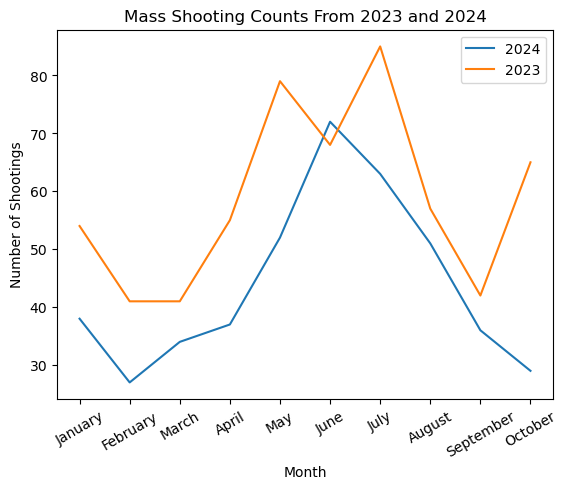

We can see that for every month besides June, there have been less mass shootings in 2024


<Figure size 640x480 with 0 Axes>

In [36]:
plt.plot(months, order_2024, label = '2024')
plt.plot(months, order_2023_short, label = '2023')
plt.xticks(rotation = 30)
plt.title('Mass Shooting Counts From 2023 and 2024')
plt.xlabel('Month')
plt.ylabel('Number of Shootings')
plt.legend()
plt.show()
plt.clf()

print("We can see that for every month besides June, there have been less mass shootings in 2024")

## Make a line graph comparing all years:

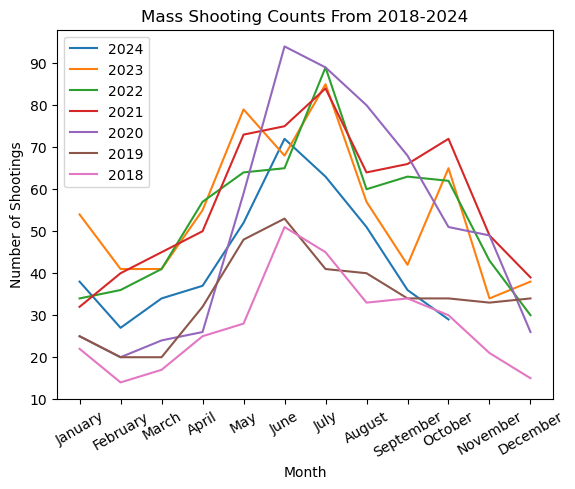

<Figure size 640x480 with 0 Axes>

In [38]:
plt.plot(months, order_2024, label = '2024')
plt.plot(months_full, order_2023, label = '2023')
plt.plot(months_full, order_2022, label = '2022')
plt.plot(months_full, order_2021, label = '2021')
plt.plot(months_full, order_2020, label = '2020')
plt.plot(months_full, order_2019, label = '2019')
plt.plot(months_full, order_2018, label = '2018')
plt.xticks(rotation = 30)
plt.title('Mass Shooting Counts From 2018-2024')
plt.xlabel('Month')
plt.ylabel('Number of Shootings')
plt.legend()
plt.show()
plt.clf()


## Let's Compare The Total Victims From 2023 (No November or December) to 2024:

In [40]:
#Combining the 2 datasets into 1:
gun_violence_2024_short['Year'] = gun_violence_2024_short.apply(lambda x: x['Incident Date'].split(', ')[1], axis=1)
gun_violence_2023_short['Year'] = gun_violence_2023_short.apply(lambda x: x['Incident Date'].split(', ')[1], axis=1)

gun_violence_both = pd.concat([gun_violence_2024_short, gun_violence_2023_short], ignore_index=True,axis=0).reset_index(drop = True)

C:\Users\miner\AppData\Local\Temp\ipykernel_14848\3479505585.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gun_violence_2024_short['Year'] = gun_violence_2024_short.apply(lambda x: x['Incident Date'].split(', ')[1], axis=1)
C:\Users\miner\AppData\Local\Temp\ipykernel_14848\3479505585.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gun_violence_2023_short['Year'] = gun_violence_2023_short.apply(lambda x: x['Incident Date'].split(', ')[1], axis=1)


C:\Users\miner\AppData\Local\Temp\ipykernel_14848\847969401.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = gun_violence_both, x='Year', y='Total Victims', palette = 'pastel')


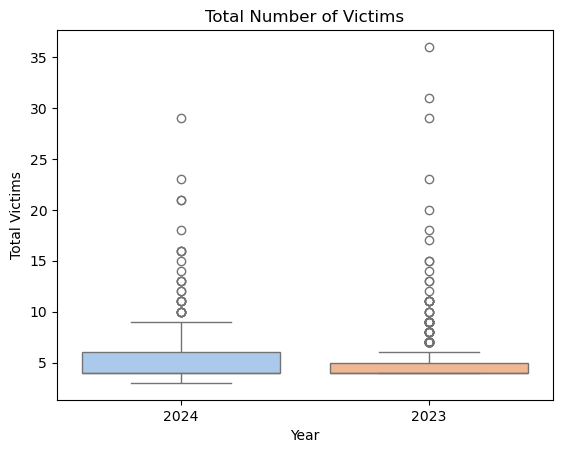

For 2023 (through October),
The median of total victims was:
4.0
The mean was:
5.2504258943781945
The standard deviation was:
2.8518762745592983
The iqr was:
1.0
The max was:
36
The min was:
4

For 2024 (through October),
The median of total victims was:
4.0
The mean was:
5.421412300683372
The standard deviation was:
2.7404997317814543
The iqr was:
2.0
The max was:
29
The min was:
3


In [41]:
#Creating boxplots and other statistic measures to compare 2023 to 2024 (both through October)
sns.boxplot(data = gun_violence_both, x='Year', y='Total Victims', palette = 'pastel')
plt.title("Total Number of Victims")
plt.show()

print("For 2023 (through October),")
print("The median of total victims was:")
print(np.median(gun_violence_both['Total Victims'][gun_violence_both['Year'] == '2023']))

print("The mean was:")
print(np.mean(gun_violence_both['Total Victims'][gun_violence_both['Year'] == '2023']))

print("The standard deviation was:")
print(np.std(gun_violence_both['Total Victims'][gun_violence_both['Year'] == '2023']))

print("The iqr was:")
print(iqr(gun_violence_both['Total Victims'][gun_violence_both['Year'] == '2023']))

print("The max was:")
print(np.max(gun_violence_both['Total Victims'][gun_violence_both['Year'] == '2023']))

print("The min was:")
print(np.min(gun_violence_both['Total Victims'][gun_violence_both['Year'] == '2023']))



print()

print("For 2024 (through October),") 
print('The median of total victims was:')
print(np.median(gun_violence_both['Total Victims'][gun_violence_both['Year'] == '2024']))

print("The mean was:")
print(np.mean(gun_violence_both['Total Victims'][gun_violence_both['Year'] == '2024']))

print("The standard deviation was:")
print(np.std(gun_violence_both['Total Victims'][gun_violence_both['Year'] == '2024']))

print("The iqr was:")
print(iqr(gun_violence_both['Total Victims'][gun_violence_both['Year'] == '2024']))

print("The max was:")
print(np.max(gun_violence_both['Total Victims'][gun_violence_both['Year'] == '2024']))

print("The min was:")
print(np.min(gun_violence_both['Total Victims'][gun_violence_both['Year'] == '2024']))

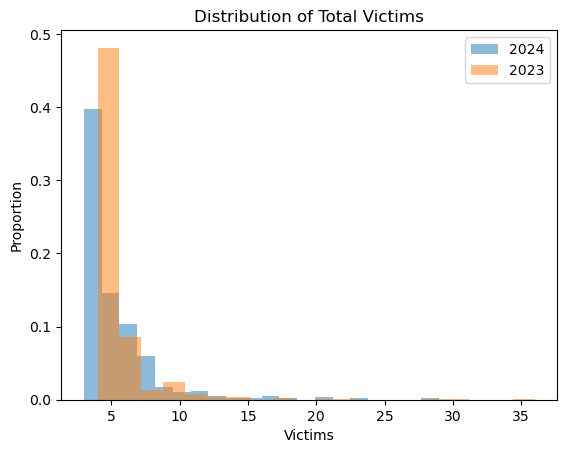

In [42]:
#Creating histograms of 2023 and 2024 (both through October)
plt.hist(gun_violence_2024_short['Total Victims'], alpha = 0.5, density = True, label = '2024', bins = 20)
plt.hist(gun_violence_2023_short['Total Victims'], alpha = 0.5, density = True, label = '2023', bins = 20)
plt.title('Distribution of Total Victims')
plt.xlabel('Victims')
plt.ylabel('Proportion')
plt.legend()
plt.show()

## Look at which States and Cities have the most mass shootings:

In [44]:
#Find the Counts for 2024
states_2024 = gun_violence_2024_short['State'].value_counts().reset_index()
city_2024 = gun_violence_2024_short["City Or County"].value_counts().reset_index()

print("The top 5 States in 2024 (through October) with mass shootings are:")
print(states_2024.head(5))

print()

print("The top 5 cities or counties in 2024 (through October) with mass shootings are:")
print(city_2024.head(5))

print()
print()
print()

#Find the counts for 2023
states_2023 = gun_violence_2023['State'].value_counts().reset_index()
city_2023 = gun_violence_2023["City Or County"].value_counts().reset_index()

print("The top 5 States in 2023 with mass shootings are:")
print(states_2023.head(5))

print()

print("The top 5 cities or counties in 2023 with mass shootings are:")
print(city_2023.head(5))

The top 5 States in 2024 (through October) with mass shootings are:
          State  count
0      Illinois     33
1    California     30
2  Pennsylvania     28
3       Florida     26
4         Texas     26

The top 5 cities or counties in 2024 (through October) with mass shootings are:
  City Or County  count
0        Chicago     25
1   Philadelphia     15
2     Washington     12
3        Memphis      9
4        Jackson      8



The top 5 States in 2023 with mass shootings are:
            State  count
0           Texas     65
1      California     51
2        Illinois     51
3    Pennsylvania     35
4  North Carolina     33

The top 5 cities or counties in 2023 with mass shootings are:
  City Or County  count
0        Chicago     34
1   Philadelphia     21
2        Memphis     14
3       Columbus     12
4         Dallas     12


C:\Users\miner\AppData\Local\Temp\ipykernel_14848\2534641718.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = states_2024.head(), x = 'State', y= 'count', palette = 'Set1')
C:\Users\miner\AppData\Local\Temp\ipykernel_14848\2534641718.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = states_2023.head(), x = 'State', y= 'count', palette = 'Set1')


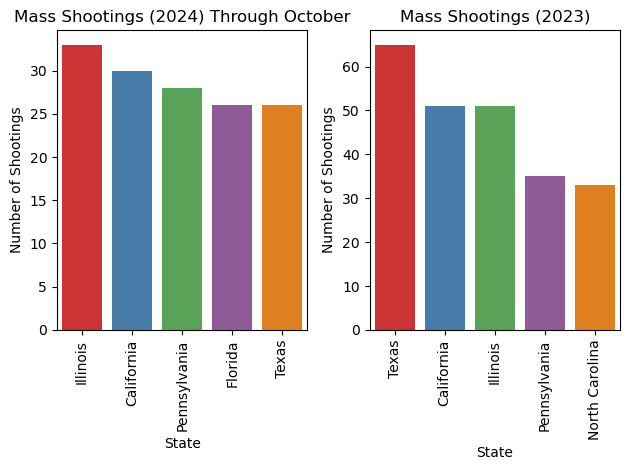

C:\Users\miner\AppData\Local\Temp\ipykernel_14848\2534641718.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = city_2024.head(), x = 'City Or County', y= 'count', palette = 'Set1')
C:\Users\miner\AppData\Local\Temp\ipykernel_14848\2534641718.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = city_2023.head(), x = 'City Or County', y= 'count', palette = 'Set1')


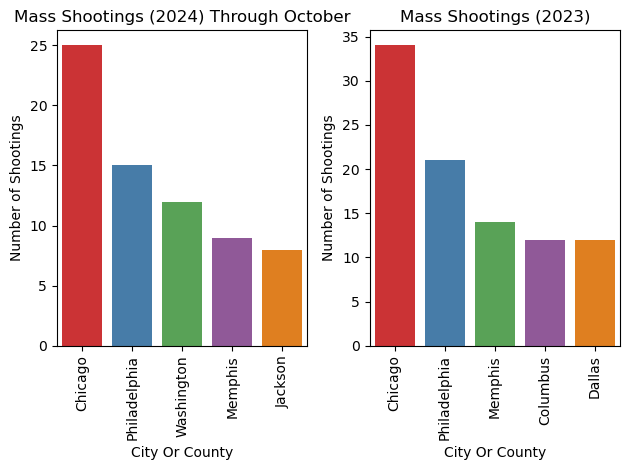

<Figure size 640x480 with 0 Axes>

In [85]:
#Creating bar graphs to visually show the data
plt.subplot(1,2,1)
sns.barplot(data = states_2024.head(), x = 'State', y= 'count', palette = 'Set1')
plt.xticks(rotation = 90)
plt.title('Mass Shootings (2024) Through October')
plt.ylabel('Number of Shootings')


plt.subplot(1,2,2)
sns.barplot(data = states_2023.head(), x = 'State', y= 'count', palette = 'Set1')
plt.xticks(rotation = 90)
plt.title('Mass Shootings (2023)')
plt.ylabel('Number of Shootings')
plt.tight_layout()
plt.show()
plt.clf()

plt.subplot(1,2,1)
sns.barplot(data = city_2024.head(), x = 'City Or County', y= 'count', palette = 'Set1')
plt.xticks(rotation = 90)
plt.title('Mass Shootings (2024) Through October')
plt.ylabel('Number of Shootings')


plt.subplot(1,2,2)
sns.barplot(data = city_2023.head(), x = 'City Or County', y= 'count', palette = 'Set1')
plt.xticks(rotation = 90)
plt.title('Mass Shootings (2023)')
plt.ylabel('Number of Shootings')
plt.tight_layout()
plt.show()
plt.clf()

## Look at total mass shootings from all years:

In [48]:
#Combining the datasets into 1:
gun_violence_2024['Year'] = gun_violence_2024.apply(lambda x: x['Incident Date'].split(', ')[1], axis=1)
gun_violence_2023['Year'] = gun_violence_2023.apply(lambda x: x['Incident Date'].split(', ')[1], axis=1)
gun_violence_2022['Year'] = gun_violence_2022.apply(lambda x: x['Incident Date'].split(', ')[1], axis=1)
gun_violence_2021['Year'] = gun_violence_2021.apply(lambda x: x['Incident Date'].split(', ')[1], axis=1)
gun_violence_2020['Year'] = gun_violence_2020.apply(lambda x: x['Incident Date'].split(', ')[1], axis=1)
gun_violence_2019['Year'] = gun_violence_2019.apply(lambda x: x['Incident Date'].split(', ')[1], axis=1)
gun_violence_2018['Year'] = gun_violence_2018.apply(lambda x: x['Incident Date'].split(', ')[1], axis=1)

gun_violence_all = pd.concat([gun_violence_2023, gun_violence_2024, gun_violence_2022, gun_violence_2021, gun_violence_2020, gun_violence_2019, gun_violence_2018], ignore_index=True,axis=0).reset_index(drop = True)

In [49]:
print(len(gun_violence_all))

print()
#Showing the total number of mass shootings in every year
print("Total mass shootings in all years (2024 is through November 1st)")
print(gun_violence_all['Year'].value_counts())

print()

#For loop that goes through each month of the year and shows how many mass shootings were in that month
for month in months_full:
    print("For the month of " + month + ", the total number of mass shootings in each year are shown below:")
    subset = gun_violence_all[gun_violence_all['Month'] == month]
    print(subset['Year'].value_counts())
    print()
    print()
    print()
    

3794

Total mass shootings in all years (2024 is through November 1st)
Year
2021    689
2023    659
2022    644
2020    611
2024    442
2019    414
2018    335
Name: count, dtype: int64

For the month of January, the total number of mass shootings in each year are shown below:
Year
2023    54
2024    38
2022    34
2021    32
2020    25
2019    25
2018    22
Name: count, dtype: int64



For the month of February, the total number of mass shootings in each year are shown below:
Year
2023    41
2021    40
2022    36
2024    27
2020    20
2019    20
2018    14
Name: count, dtype: int64



For the month of March, the total number of mass shootings in each year are shown below:
Year
2021    45
2023    41
2022    41
2024    34
2020    24
2019    20
2018    17
Name: count, dtype: int64



For the month of April, the total number of mass shootings in each year are shown below:
Year
2022    57
2023    55
2021    50
2024    37
2019    32
2020    26
2018    25
Name: count, dtype: int64



For the 

In [50]:
#Export entire dataframe with all years included as a csv file
gun_violence_all.to_csv('gun_violence_all.csv', index=False)

## Conclusions:
##### 1.) Find the states and cities with the greatest number of shootings
* States 2024 top 5:
    * Illinois
    * California
    * Pennsylvania
    * Florida
    * Texas
* Cities and Counties 2024 top 5:
    * Chicago
    * Philadelphia
    * Washington
    * Memphis
    * Jackson
##### 2.) Find how many people have been impacted by mass shootings this year
* In 2024 (up through November 1st), 2,398 people have been either injured or killed in mass shootings.
    * 439 Killed
    * 1959 Injured
##### 3.) Find the month with the greatest number of shootings
* June has the most so far with 72. The second highest is July with 63, and the lowest is February with 27.
##### 4.) Compare data from 2024 to 2023 and other previous years
* For the most part, 2024 has been a strong improvement from 2023. For almost every single month of 2024 thus far, there have been less mass shootings than in 2023. The only month where this hasn't been the case was in June. In 2023, June had 68 mass shootings (the 3rd highest for that year), and in 2024, there were 72 mass shootings (the highest of the year, and an increase of 5.9% from last year).
* When looking at October with data from 2018-2024, this October had lowest number of mass shootings out of all of those years (29 mass shootings). The next lowest for October was 2018 with 30 and 2019 with 34.
* So far, 2024 ranks as the year with the third lowest amount of mass shootings with 439 (through October). The 2 years with the lowest are 2019 (414 mass shootings) and 2018 (335 mass shootings). The year right above 2024 is 2020 with 611 mass shootings (a difference of 172 mass shootings).
* When looking at the graphs and the data, we can see that there appears to be a trend towards the end of the year where November and December typically have some of the fewest counts of mass shootings for the year. In fact, for 2018 to 2023, every single year has had less mass shootings in November compared to October. We can also see that November and December have never had more mass shootings than in October in these last 6 years.
* In order for 2024 to go from the 3rd lowest year based on mass shooting counts to the 4th lowest, November and December combined would have to add up to over 169 total mass shootings. Remember that the peak of 2024 was in June with 72. In order to reach 162, November and December would most likely have to peak above the month with the current maximum. When looking at the past 6 years, this has never happened before. Therefore, basing a future preiction off of this data, it is likely that 2024 will remain as the year with the third lowest number of mass shootings within the last 6 years.